In [84]:
#Import Libraries
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [85]:
##from google.colab import files
# uploaded = files.upload()
##read file
#df = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))

In [86]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [87]:
df 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [88]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [89]:
df.shape

(5110, 12)

In [90]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Pre-processing Data

In [91]:
#checking for NaN values
df.isnull().sum()
#bmi has 201 null values that need to be configured

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [92]:
#configuring the 201 null values in the bmi column
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [93]:
#checking if there are anymore null values in the overall dataset
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [94]:
df = df.drop("id", axis=1)

In [95]:
#checking to make sure the dataframe has updated with the new changes
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [96]:
#view mean, precentile ,std etc
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Create visualizations to better understand the features of the dataset and their correlation with one another

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

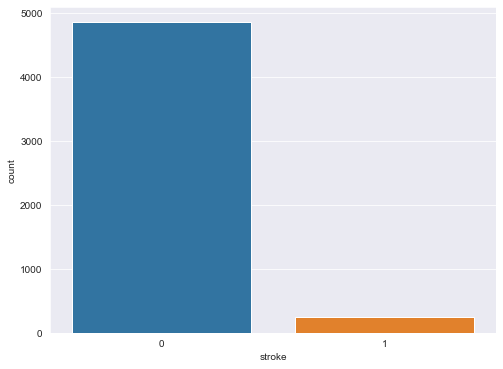

In [97]:
#visualizing stroke feature 
sns.countplot(df['stroke'])

In [98]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

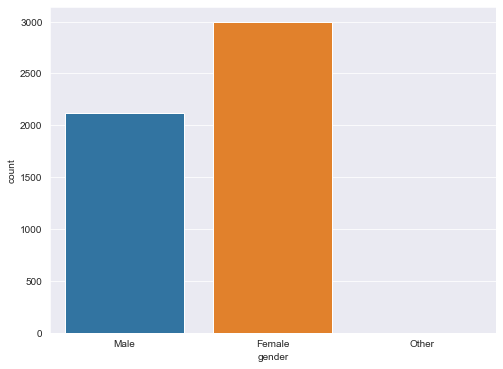

In [99]:
#visualizing gender feature (female and male)
sns.countplot(df['gender'])

In [100]:
#count number of female and male
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

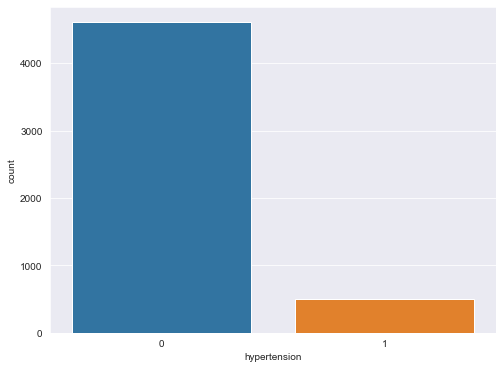

In [101]:
#visualizing hypertension feature btw (lower and higher)
sns.countplot(df['hypertension'])

In [102]:
#count the number of people with lbp and hbp
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

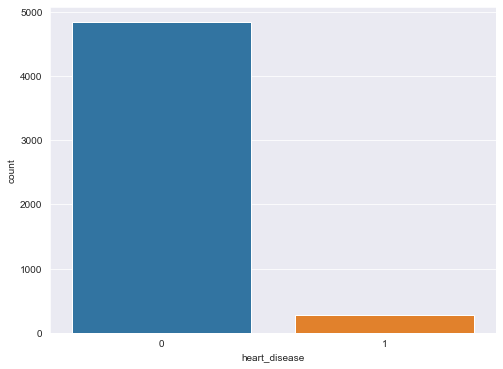

In [103]:
#visualizing population data with heart disease
sns.countplot(df['heart_disease'])

In [104]:
#count the number of people with and without heart disease
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

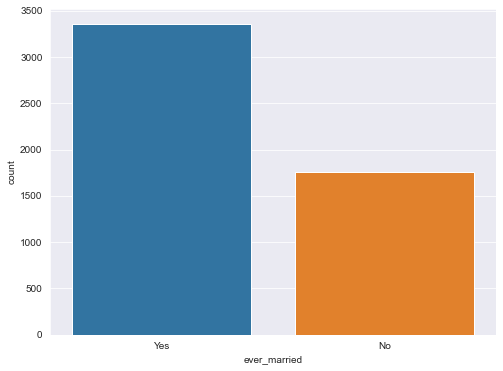

In [105]:
#visualizing populations marital status
sns.countplot(df['ever_married'])

In [106]:
#count the number of people that are married and single
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

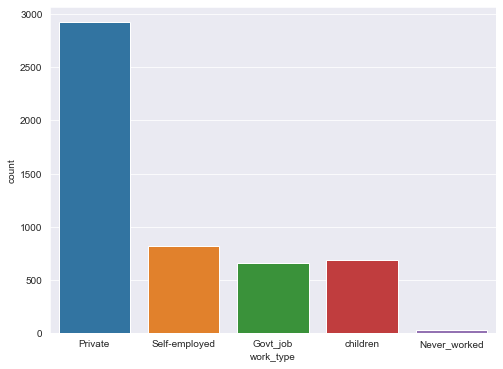

In [107]:
#visualizing the population work type (Self-Employed or Private)
sns.countplot(df['work_type'])

In [108]:
#count the number of self-employed and private
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

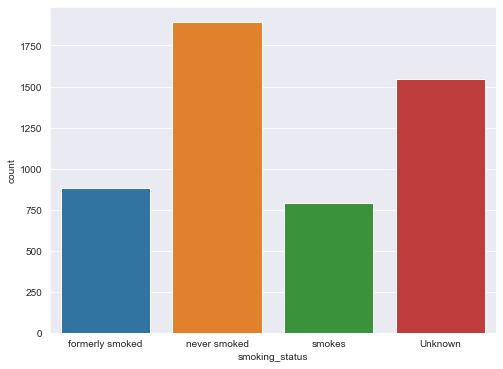

In [109]:
#visualizing the populations smaoking status
sns.countplot(df['smoking_status'])

In [110]:
#count the number of smokers, nonsmokers, formerly smoked etc.
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

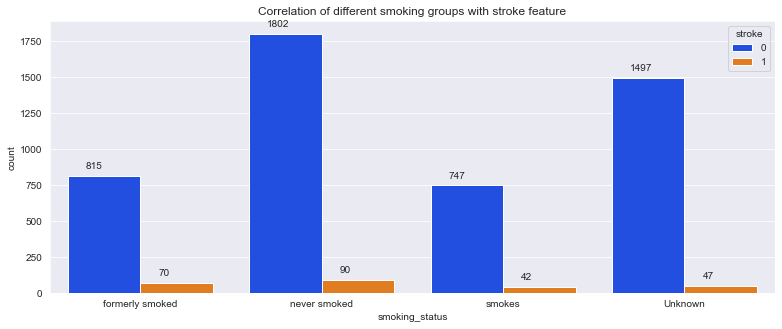

In [111]:
#correlation of the data with one another. The relationship btw the group of smokers and stroke.
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoking_status',data=df, palette='bright',hue='stroke')
plt.title("Correlation of different smoking groups with stroke feature")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+50))

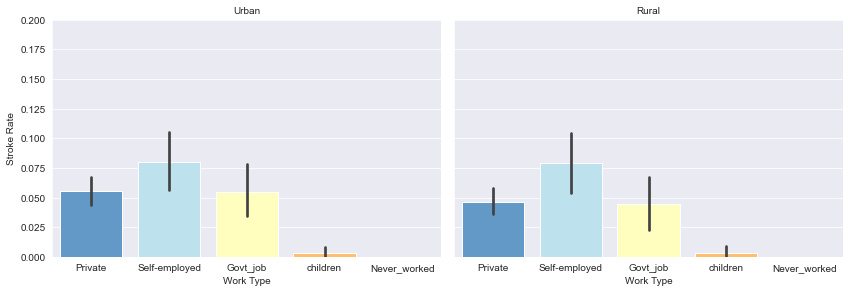

In [112]:
lifestyle = sns.catplot(x='work_type',y='stroke', col = 'Residence_type', data=df, kind='bar', palette='RdYlBu_r', saturation =2.5)
(lifestyle .set_axis_labels("Work Type", "Stroke Rate").set_titles("{col_name}").set(ylim=(0,0.20)))
lifestyle .fig.set_figwidth(12)
lifestyle .fig.set_figheight(4)

<AxesSubplot:>

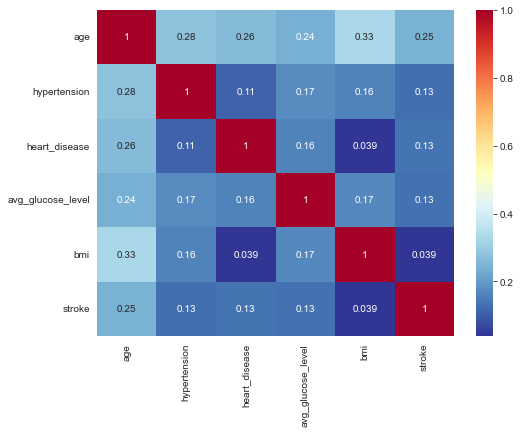

In [113]:
sns.heatmap(df.corr(), cmap = 'RdYlBu_r',annot=True)

Convert strings to numerical values

In [114]:
#configure the other columns of the dataset to be appropriate for a classification model implementation
#gender seems to be the categorical feature that needs to be modified
df['gender'].replace('Female',0, inplace=True)
df['gender'].replace('Male', 1, inplace=True)
df['gender'].replace('Other', 2, inplace=True)

In [115]:
df['gender']=df['gender'].astype('int64')

In [116]:
df['Residence_type'].replace('Urban',1,inplace=True)
df['Residence_type'].replace('Rural',0,inplace=True)
df['ever_married'].replace('Yes',1,inplace=True)
df['ever_married'].replace('No',0,inplace=True)

In [117]:
print(df['work_type'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [118]:
print(df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [119]:
df['work_type'].replace('Private',0,inplace=True)
df['work_type'].replace('Self-employed',1,inplace=True)
df['work_type'].replace('Govt_job',2,inplace=True)
df['work_type'].replace('children',3,inplace=True)
df['work_type'].replace('Never_worked',4,inplace=True)
df['smoking_status'].replace('formerly smoked',0,inplace=True)
df['smoking_status'].replace('never smoked',1,inplace=True)
df['smoking_status'].replace('smokes',2,inplace=True)
df['smoking_status'].replace('Unknown',3,inplace=True)

In [120]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.600000,0,1
1,0,61.0,0,0,1,1,0,202.21,28.893237,1,1
2,1,80.0,0,1,1,0,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,1,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.893237,1,0
5106,0,81.0,0,0,1,1,1,125.20,40.000000,1,0
5107,0,35.0,0,0,1,1,0,82.99,30.600000,1,0
5108,1,51.0,0,0,1,0,0,166.29,25.600000,0,0


<AxesSubplot:>

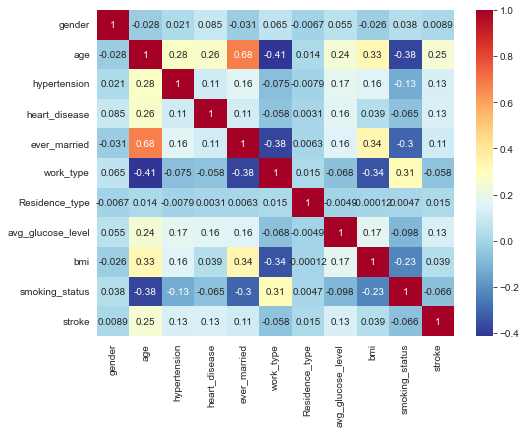

In [121]:
sns.heatmap(df.corr(), cmap = 'RdYlBu_r',annot=True)

Data Splitting

In [122]:
X = df[[ 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',]]
y = df['stroke']

In [123]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,0,1,228.69,36.600000,0
1,0,61.0,0,0,1,1,0,202.21,28.893237,1
2,1,80.0,0,1,1,0,0,105.92,32.500000,1
3,0,49.0,0,0,1,0,1,171.23,34.400000,2
4,0,79.0,1,0,1,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.893237,1
5106,0,81.0,0,0,1,1,1,125.20,40.000000,1
5107,0,35.0,0,0,1,1,0,82.99,30.600000,1
5108,1,51.0,0,0,1,0,0,166.29,25.600000,0


In [124]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3162)

# Create KNN Model

In [126]:
knn = KNeighborsClassifier()

In [127]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9504240052185258

In [128]:
y_pred_knn = knn.predict(X_test)

<AxesSubplot:>

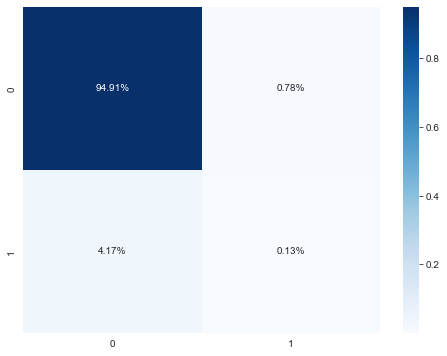

In [129]:
matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(
    matrix/np.sum(matrix),
    annot=True,
    cmap='Blues',
    fmt='.2%'
)

In [130]:
precision_recall_fscore_support(y_test, y_pred_knn, average='macro')

(0.5503620803159973, 0.5110615356014129, 0.5122739450770261, None)

# Create SVM Model

In [131]:
svm = SVC()

In [132]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9569471624266145

In [133]:
y_pred_svm = svm.predict(X_test)

<AxesSubplot:>

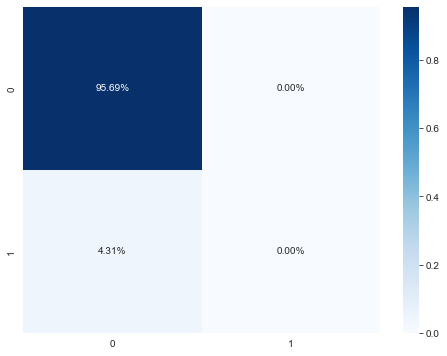

In [134]:
matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(
    matrix/np.sum(matrix),
    annot=True,
    cmap='Blues',
    fmt='.2%'
)

In [135]:
precision_recall_fscore_support(y_test, y_pred_svm, average='macro')

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.47847358121330724, 0.5, 0.48900000000000005, None)

# Create decision tree

In [136]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',]]
y = df['stroke']

In [137]:
classifier = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.3)

In [138]:
X.shape, y.shape

((5110, 10), (5110,))

In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test2.shape

((3577, 10), (1533, 10), (3577,), (1533,))

In [140]:
#train our model
classifier = classifier.fit(X_train, y_train)

In [141]:
names = []
for i in X.columns:
    names.append(i) 
r = export_text(classifier, feature_names = names)
print(r)

|--- age <= 67.50
|   |--- age <= 49.50
|   |   |--- age <= 37.50
|   |   |   |--- age <= 1.36
|   |   |   |   |--- bmi <= 26.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  26.90
|   |   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- gender >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- age >  1.36
|   |   |   |   |--- age <= 31.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  31.50
|   |   |   |   |   |--- age <= 32.50
|   |   |   |   |   |   |--- avg_glucose_level <= 76.65
|   |   |   |   |   |   |   |--- avg_glucose_level <= 75.28
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- avg_glucose_level >  75.28
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- avg_glucose_level >  76.65
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  32.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- age >  37.50
|   |   | 

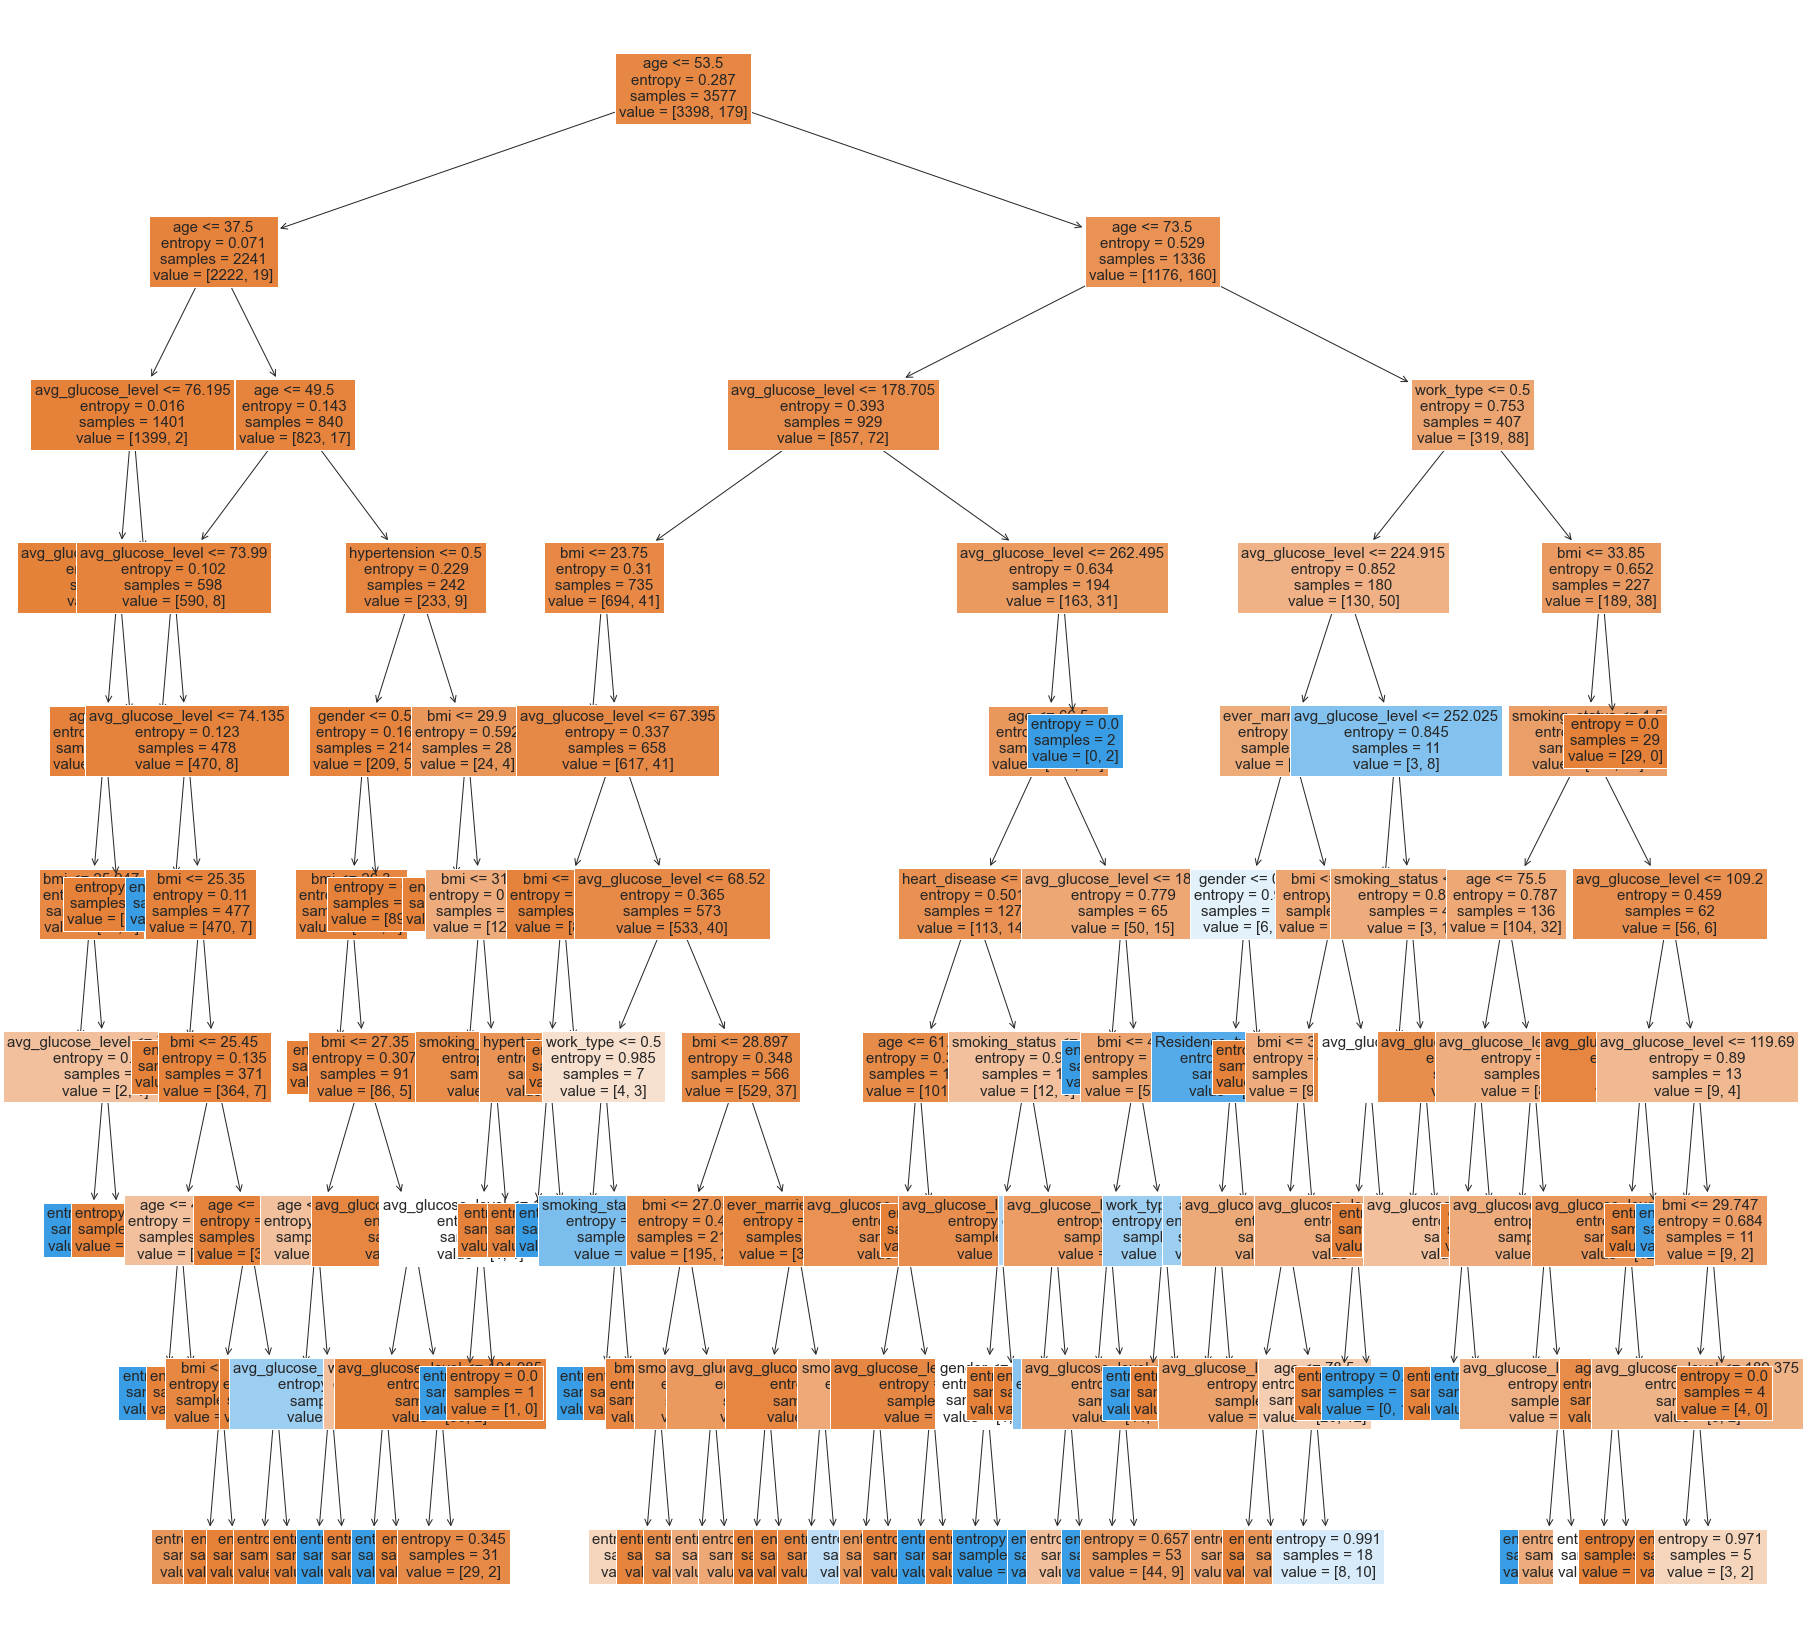

In [159]:
#plot decision tree
fig = plt.figure(figsize=(30,30))
tree.plot_tree(classifier, feature_names = X.columns, fontsize=15, filled=True);

In [143]:
#Check tree depth
print(classifier.tree_.max_depth)

26


# Evaluation Tree

In [144]:
y_pred2 = classifier.predict(X_test)

In [145]:
#produce an accuracy score
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9119373776908023


In [146]:
#produce precision, recall, and f1 score
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1463
           1       0.11      0.13      0.12        70

    accuracy                           0.91      1533
   macro avg       0.53      0.54      0.54      1533
weighted avg       0.92      0.91      0.92      1533



# Compare results of Gini vs Entropy metrics

In [147]:
#use Gini metric in different depth
for i in range(1, 10):   
    classifier = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=i)
    classifier.fit(X_train, y_train)
    print(f"Depth {i} accuracy (Gini): {classifier.score(X_test, y_test2)}")

Depth 1 accuracy (Gini): 0.954337899543379
Depth 2 accuracy (Gini): 0.954337899543379
Depth 3 accuracy (Gini): 0.954337899543379
Depth 4 accuracy (Gini): 0.954337899543379
Depth 5 accuracy (Gini): 0.9530332681017613
Depth 6 accuracy (Gini): 0.9471624266144814
Depth 7 accuracy (Gini): 0.943900848010437
Depth 8 accuracy (Gini): 0.9354207436399217
Depth 9 accuracy (Gini): 0.9386823222439661


In [148]:
#use entropy metric in different depth
for i in range(1, 10):   
    classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    classifier.fit(X_train, y_train)
    print(f"Depth {i} accuracy (Entropy): {classifier.score(X_test, y_test2)}")

Depth 1 accuracy (Entropy): 0.954337899543379
Depth 2 accuracy (Entropy): 0.954337899543379
Depth 3 accuracy (Entropy): 0.954337899543379
Depth 4 accuracy (Entropy): 0.9452054794520548
Depth 5 accuracy (Entropy): 0.9419439008480104
Depth 6 accuracy (Entropy): 0.9393346379647749
Depth 7 accuracy (Entropy): 0.9354207436399217
Depth 8 accuracy (Entropy): 0.9360730593607306
Depth 9 accuracy (Entropy): 0.9308545335942596


### Logistic Regression

In [149]:
X3 = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',]]
y3 = df['stroke']

In [150]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)

In [151]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train3, y_train3)

/Users/liyutenaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [152]:
y_pred3 = logisticRegr.predict(X_test3)

In [153]:
MAE3= metrics.mean_absolute_error(y_test3, y_pred3)
print('MAE: \n', MAE3)

MSE3= metrics.mean_squared_error(y_test3, y_pred3)
print('MSE: \n', MSE3)

RMSE3 = np.sqrt(MSE3)
print('RMSE: \n', RMSE3)

MAE: 
 0.04773082942097027
MSE: 
 0.04773082942097027
RMSE: 
 0.2184738643887874


# Visualization for all model with their Accuracy 

In [154]:
## create an array
list_x=[]
list_y=[]

In [155]:
## add values to list_y
list_y.append("KNN")
list_y.append("Decision Tree")
list_y.append("Logistic Regression")
list_y.append("SVM")

In [156]:
## create accuracy variable
KNN_acc = accuracy_score(y_test, y_pred_knn)
Tree_acc= accuracy_score(y_test2, y_pred2)
Logistic_acc = accuracy_score(y_test3, y_pred3)
Svm_acc = accuracy_score(y_test, y_pred_svm)
print(KNN_acc)
print(Tree_acc)
print(Logistic_acc)
print(Svm_acc)

0.9504240052185258
0.9119373776908023
0.9522691705790297
0.9569471624266145


In [157]:
## add values to list_x
list_x.append(KNN_acc)
list_x.append(Tree_acc)
list_x.append(Logistic_acc)
list_x.append(Svm_acc)

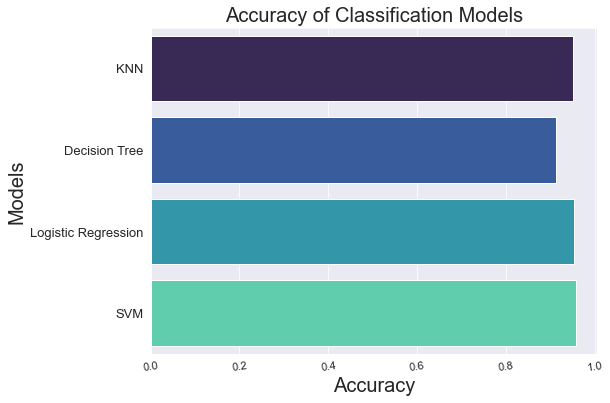

In [158]:
#create visualization
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=list_x, y=list_y, palette = "mako", saturation =1.5)
plt.xlabel("Accuracy", fontsize = 20 )
plt.ylabel("Models", fontsize = 20)
plt.title("Accuracy of Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)

plt.show()